## 1. Setup and Data Loading

In [92]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [94]:
# Load the dataset
df = pd.read_csv('data.csv')
print(f'Dataset shape: {df.shape}')
print(f'\nColumns ({len(df.columns)}):')
print(df.columns.tolist())

Dataset shape: (50000, 30)

Columns (30):
['run_id', 'page_hash', 'workspace_hash', 'run_status', 'duration_seconds', 'start_hour', 'day_of_week', 'month', 'is_weekend', 'is_business_hours', 'total_blocks', 'sql_blocks', 'tableau_blocks', 'email_blocks', 'slack_blocks', 'parameter_blocks', 'code_blocks', 'plotly_blocks', 'kpi_blocks', 'api_blocks', 'writeback_blocks', 'conditional_blocks', 'loop_blocks', 'ai_blocks', 'storage_blocks', 'historical_run_count', 'historical_avg_duration', 'historical_median_duration', 'historical_stddev_duration', 'historical_failure_rate']


In [96]:
# Display first few rows
df.head(10)

,run_id,page_hash,workspace_hash,run_status,duration_seconds,start_hour,day_of_week,month,is_weekend,is_business_hours,total_blocks,sql_blocks,tableau_blocks,email_blocks,slack_blocks,parameter_blocks,code_blocks,plotly_blocks,kpi_blocks,api_blocks,writeback_blocks,conditional_blocks,loop_blocks,ai_blocks,storage_blocks,historical_run_count,historical_avg_duration,historical_median_duration,historical_stddev_duration,historical_failure_rate
0,245800,4a914e5c38172ae9b61780ffbd0b2f90,fc528592c3858f90196fbfacc814f235,success,13.076646,17,0,6,1,1,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4701,13.606148,12.598929,30.369788,0.000851
1,133534,1f32d8e8c7ca28653a0361e776a48733,fc528592c3858f90196fbfacc814f235,success,9.205977,14,2,2,0,1,6,1,1,1,0,1,0,0,0,0,0,0,0,0,0,5303,27.264997,29.757952,32.322488,0.002074
2,272130,11add9933745e1c3ee82d10f03d853b5,fc528592c3858f90196fbfacc814f235,success,51.816337,3,2,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,0,0,0,5305,34.466373,37.608081,67.354162,0.001697
3,173190,2298d401e38ecd89706918103116ca07,66808e327dc79d135ba18e051673d906,success,8.591653,21,5,3,0,0,40,31,0,0,0,8,0,0,0,0,0,0,0,0,0,74,6.180074,4.994279,3.692350,0.162162
4,304092,971bbe989ad132e834b0ccb3f32e92ee,c4f796afbc6267501964b46427b3f6ba,success,18.971137,16,0,7,1,1,7,1,0,1,0,0,0,0,0,0,0,0,0,0,0,151,32.138465,24.192645,28.495035,0.006623
5,185326,783789429d08b80f58e54e2c76fd6d27,c4f796afbc6267501964b46427b3f6ba,success,43.636341,16,4,4,0,1,7,1,0,1,0,0,0,0,0,0,0,0,0,0,0,145,54.643208,24.918368,286.971910,0.013793
6,211245,ebd75b8970e12771b1aab92eb59cf0c2,c4f796afbc6267501964b46427b3f6ba,success,6.883673,18,2,4,0,0,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3430,15.706420,7.334563,31.374708,0.003790
7,129378,44f455185e5ae730f5e12534aaaa5e02,8f125da0b3432ed853c0b6f7ee5aaa6b,success,0.929556,9,4,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31784,0.696886,0.657386,0.206034,0.000000
8,202422,7c72900e0b6e4108fdf991b696776f6c,fc528592c3858f90196fbfacc814f235,success,18.495298,5,1,4,0,0,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,31,18.837618,17.843548,8.795209,0.387097
9,157731,1f32d8e8c7ca28653a0361e776a48733,fc528592c3858f90196fbfacc814f235,success,8.016976,19,2,3,0,0,6,1,1,1,0,1,0,0,0,0,0,0,0,0,0,5303,27.264997,29.757952,32.322488,0.002074


In [98]:
# Data types and missing values
print('Data Types:')
print(df.dtypes)
print('\nMissing Values:')
print(df.isnull().sum())

Data Types:
run_id                          int64
page_hash                      object
workspace_hash                 object
run_status                     object
duration_seconds              float64
start_hour                      int64
day_of_week                     int64
month                           int64
is_weekend                      int64
is_business_hours               int64
total_blocks                    int64
sql_blocks                      int64
tableau_blocks                  int64
email_blocks                    int64
slack_blocks                    int64
parameter_blocks                int64
code_blocks                     int64
plotly_blocks                   int64
kpi_blocks                      int64
api_blocks                      int64
writeback_blocks                int64
conditional_blocks              int64
loop_blocks                     int64
ai_blocks                       int64
storage_blocks                  int64
historical_run_count            int64


In [100]:
# Basic statistics
df.describe()

,run_id,duration_seconds,start_hour,day_of_week,month,is_weekend,is_business_hours,total_blocks,sql_blocks,tableau_blocks,email_blocks,slack_blocks,parameter_blocks,code_blocks,plotly_blocks,kpi_blocks,api_blocks,writeback_blocks,conditional_blocks,loop_blocks,ai_blocks,storage_blocks,historical_run_count,historical_avg_duration,historical_median_duration,historical_stddev_duration,historical_failure_rate
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.00000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,217967.48256,19.963386,11.325180,2.969240,4.549000,0.246140,0.420400,8.849420,2.761340,0.698900,0.703320,0.352960,0.408200,0.029520,0.007780,0.002780,0.049360,0.033580,0.0,0.0,0.00312,0.0,7892.649860,20.184834,15.234345,31.149017,0.117863
std,62998.20731,71.720351,6.466665,1.923488,2.048464,0.430765,0.493628,12.613455,8.948179,2.317254,1.049268,0.810403,0.851509,0.301812,0.147241,0.079072,0.256525,0.390353,0.0,0.0,0.05577,0.0,10856.266657,38.867308,30.306136,56.898396,0.253588
min,110183.00000,0.148959,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,1.000000,0.359199,0.283736,0.000000,0.000000
25%,163745.50000,3.742813,6.000000,1.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,423.000000,4.599664,3.837824,1.842275,0.000486
50%,217921.00000,8.609173,11.000000,3.000000,5.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,4586.000000,11.929890,9.856205,12.443543,0.005453
75%,272940.25000,16.991931,16.000000,5.000000,6.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,8044.000000,20.209004,14.366677,33.321977,0.068182
max,331098.00000,3366.361376,23.000000,6.000000,8.000000,1.000000,1.000000,95.000000,77.000000,41.000000,8.000000,10.000000,13.000000,10.000000,5.000000,6.000000,9.000000,11.000000,0.0,0.0,1.00000,0.0,31784.000000,722.880817,781.962974,729.219440,1.000000


## 2. Target Variable Analysis

In [102]:
# Target variable: duration_seconds
print('Target Variable Statistics:')
print(f"Mean: {df['duration_seconds'].mean():.2f} seconds")
print(f"Median: {df['duration_seconds'].median():.2f} seconds")
print(f"Std: {df['duration_seconds'].std():.2f} seconds")
print(f"Min: {df['duration_seconds'].min():.2f} seconds")
print(f"Max: {df['duration_seconds'].max():.2f} seconds")
print(f"\nPercentiles:")
print(f"25th: {df['duration_seconds'].quantile(0.25):.2f} seconds")
print(f"50th: {df['duration_seconds'].quantile(0.50):.2f} seconds")
print(f"75th: {df['duration_seconds'].quantile(0.75):.2f} seconds")
print(f"90th: {df['duration_seconds'].quantile(0.90):.2f} seconds")
print(f"95th: {df['duration_seconds'].quantile(0.95):.2f} seconds")
print(f"99th: {df['duration_seconds'].quantile(0.99):.2f} seconds")

Target Variable Statistics:
Mean: 19.96 seconds
Median: 8.61 seconds
Std: 71.72 seconds
Min: 0.15 seconds
Max: 3366.36 seconds

Percentiles:
25th: 3.74 seconds
50th: 8.61 seconds
75th: 16.99 seconds
90th: 37.67 seconds
95th: 52.31 seconds
99th: 209.99 seconds


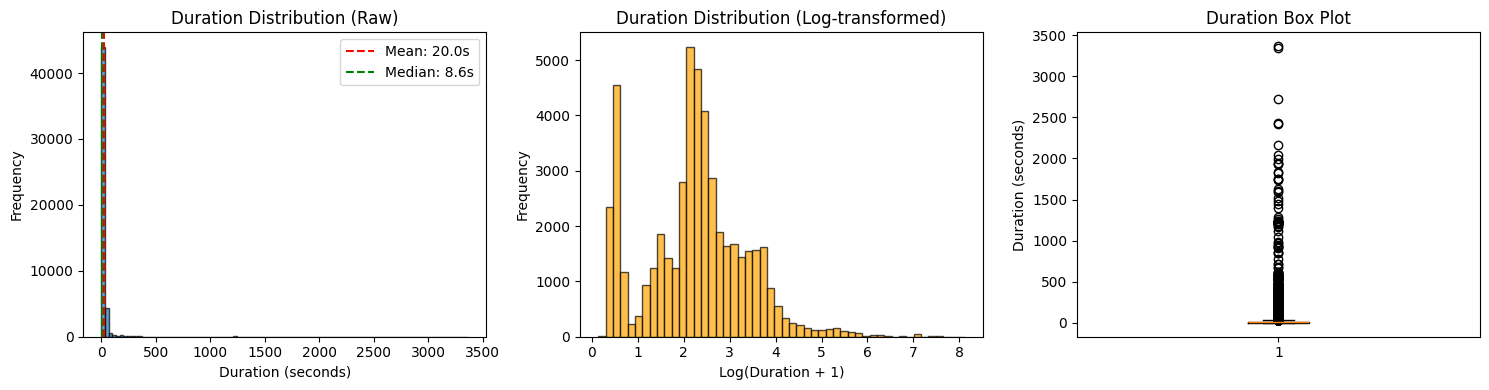


Skewness (raw): 18.87
Skewness (log): 0.35


In [104]:
# Distribution of duration (raw)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Raw distribution
axes[0].hist(df['duration_seconds'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Duration Distribution (Raw)')
axes[0].axvline(df['duration_seconds'].mean(), color='red', linestyle='--', label=f"Mean: {df['duration_seconds'].mean():.1f}s")
axes[0].axvline(df['duration_seconds'].median(), color='green', linestyle='--', label=f"Median: {df['duration_seconds'].median():.1f}s")
axes[0].legend()

# Log-transformed distribution
log_duration = np.log1p(df['duration_seconds'])
axes[1].hist(log_duration, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log(Duration + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Duration Distribution (Log-transformed)')

# Box plot
axes[2].boxplot(df['duration_seconds'])
axes[2].set_ylabel('Duration (seconds)')
axes[2].set_title('Duration Box Plot')

plt.tight_layout()
plt.show()

print(f"\nSkewness (raw): {df['duration_seconds'].skew():.2f}")
print(f"Skewness (log): {log_duration.skew():.2f}")

In [106]:
# Run status distribution
print('Run Status Distribution:')
print(df['run_status'].value_counts())
print(f"\nSuccess Rate: {(df['run_status'] == 'success').mean() * 100:.2f}%")

Run Status Distribution:
run_status
success      44066
failed        5928
cancelled        6
Name: count, dtype: int64

Success Rate: 88.13%


## 3. Exploratory Data Analysis

In [108]:
# Define feature groups
timing_features = ['start_hour', 'day_of_week', 'month', 'is_weekend', 'is_business_hours']
block_features = ['total_blocks', 'sql_blocks', 'tableau_blocks', 'email_blocks', 'slack_blocks',
                  'parameter_blocks', 'code_blocks', 'plotly_blocks', 'kpi_blocks', 'api_blocks',
                  'writeback_blocks', 'conditional_blocks', 'loop_blocks', 'ai_blocks', 'storage_blocks']
historical_features = ['historical_run_count', 'historical_avg_duration', 'historical_median_duration',
                       'historical_stddev_duration', 'historical_failure_rate']

print(f"Timing Features ({len(timing_features)}): {timing_features}")
print(f"\nBlock Features ({len(block_features)}): {block_features}")
print(f"\nHistorical Features ({len(historical_features)}): {historical_features}")

Timing Features (5): ['start_hour', 'day_of_week', 'month', 'is_weekend', 'is_business_hours']

Block Features (15): ['total_blocks', 'sql_blocks', 'tableau_blocks', 'email_blocks', 'slack_blocks', 'parameter_blocks', 'code_blocks', 'plotly_blocks', 'kpi_blocks', 'api_blocks', 'writeback_blocks', 'conditional_blocks', 'loop_blocks', 'ai_blocks', 'storage_blocks']

Historical Features (5): ['historical_run_count', 'historical_avg_duration', 'historical_median_duration', 'historical_stddev_duration', 'historical_failure_rate']


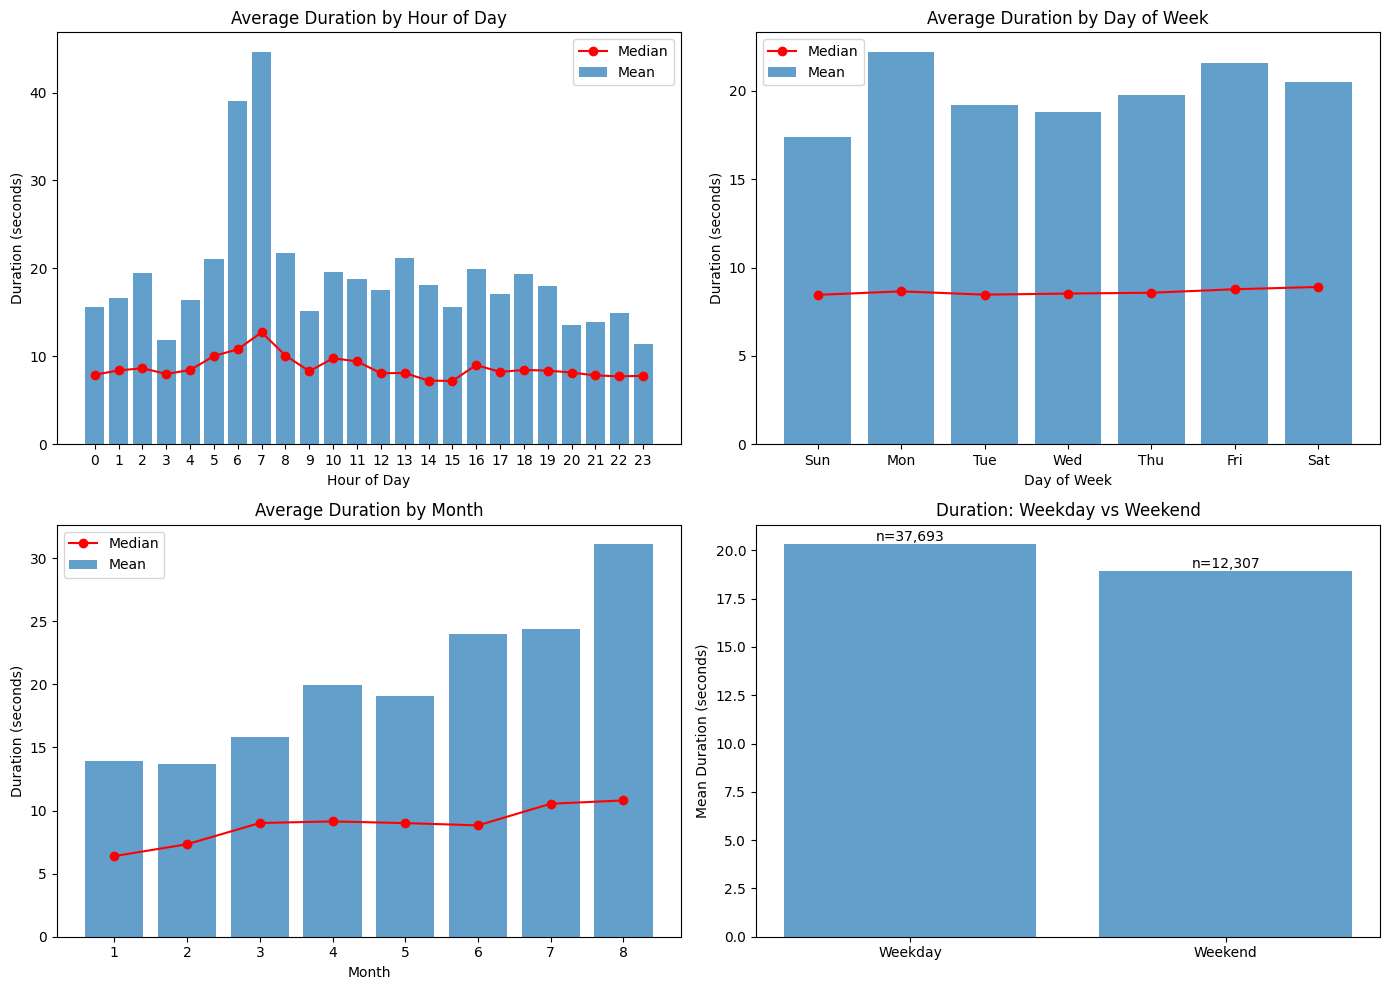

In [110]:
# Duration by hour of day
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# By hour
hourly_stats = df.groupby('start_hour')['duration_seconds'].agg(['mean', 'median', 'count'])
axes[0, 0].bar(hourly_stats.index, hourly_stats['mean'], alpha=0.7, label='Mean')
axes[0, 0].plot(hourly_stats.index, hourly_stats['median'], 'ro-', label='Median')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Duration (seconds)')
axes[0, 0].set_title('Average Duration by Hour of Day')
axes[0, 0].legend()
axes[0, 0].set_xticks(range(24))

# By day of week
day_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
daily_stats = df.groupby('day_of_week')['duration_seconds'].agg(['mean', 'median'])
axes[0, 1].bar(daily_stats.index, daily_stats['mean'], alpha=0.7, label='Mean')
axes[0, 1].plot(daily_stats.index, daily_stats['median'], 'ro-', label='Median')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Duration (seconds)')
axes[0, 1].set_title('Average Duration by Day of Week')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_names)
axes[0, 1].legend()

# By month
monthly_stats = df.groupby('month')['duration_seconds'].agg(['mean', 'median'])
axes[1, 0].bar(monthly_stats.index, monthly_stats['mean'], alpha=0.7, label='Mean')
axes[1, 0].plot(monthly_stats.index, monthly_stats['median'], 'ro-', label='Median')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Duration (seconds)')
axes[1, 0].set_title('Average Duration by Month')
axes[1, 0].legend()

# Weekend vs Weekday
weekend_stats = df.groupby('is_weekend')['duration_seconds'].agg(['mean', 'median', 'count'])
weekend_stats.index = ['Weekday', 'Weekend']
axes[1, 1].bar(weekend_stats.index, weekend_stats['mean'], alpha=0.7)
axes[1, 1].set_ylabel('Mean Duration (seconds)')
axes[1, 1].set_title('Duration: Weekday vs Weekend')
for i, (idx, row) in enumerate(weekend_stats.iterrows()):
    axes[1, 1].annotate(f"n={int(row['count']):,}", (i, row['mean']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

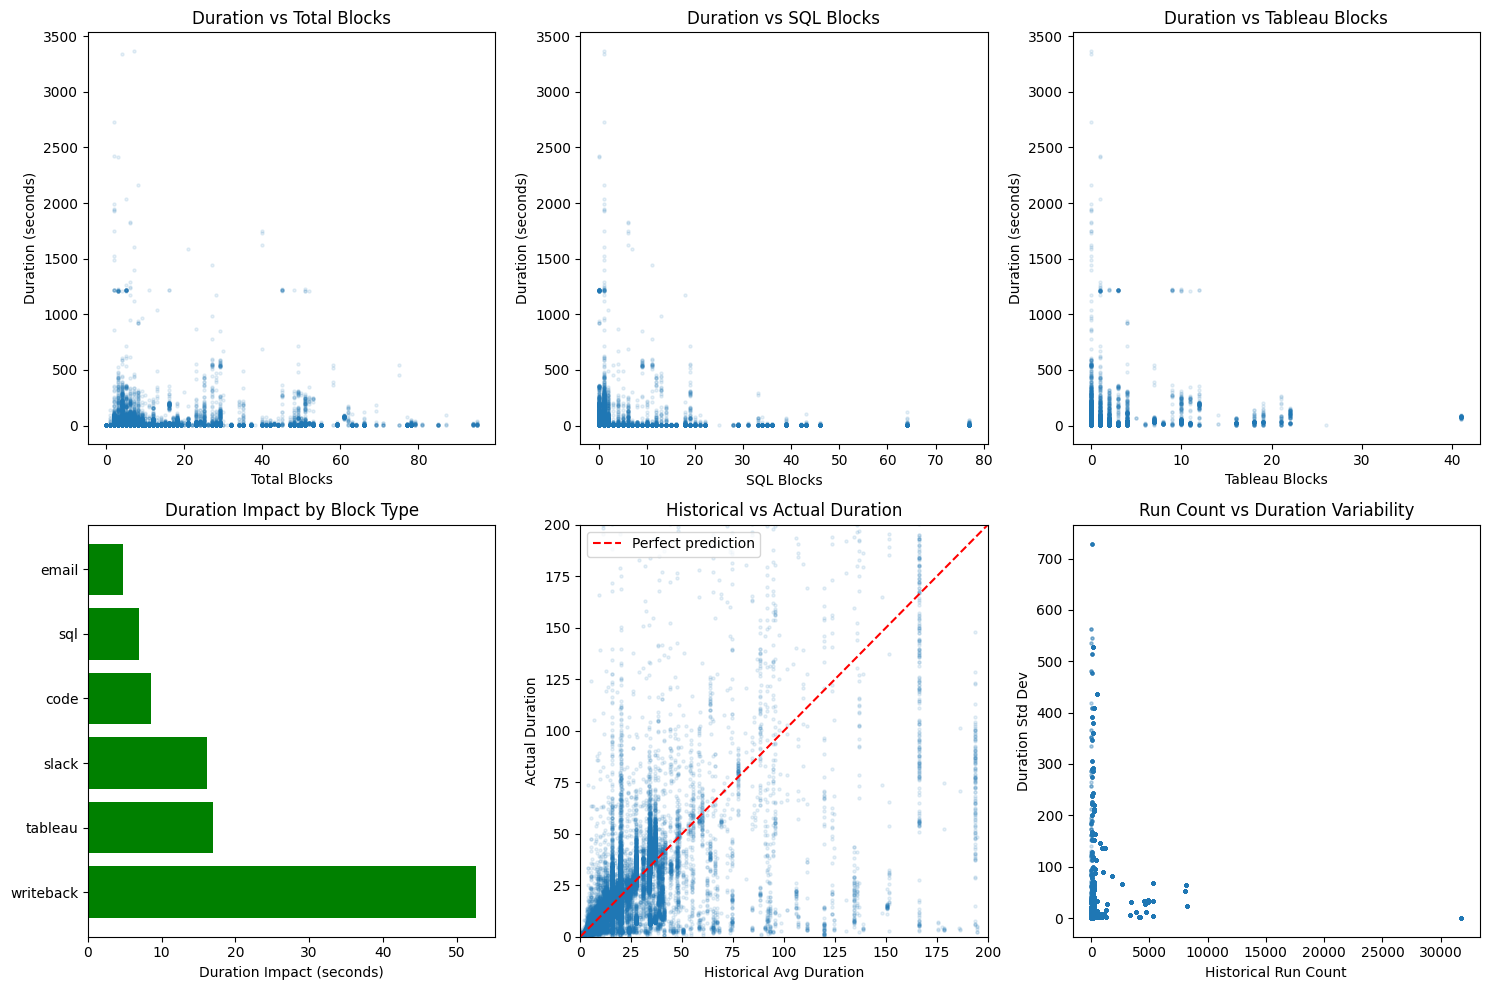

In [112]:
# Block composition analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Total blocks vs duration
axes[0, 0].scatter(df['total_blocks'], df['duration_seconds'], alpha=0.1, s=5)
axes[0, 0].set_xlabel('Total Blocks')
axes[0, 0].set_ylabel('Duration (seconds)')
axes[0, 0].set_title('Duration vs Total Blocks')

# SQL blocks vs duration
axes[0, 1].scatter(df['sql_blocks'], df['duration_seconds'], alpha=0.1, s=5)
axes[0, 1].set_xlabel('SQL Blocks')
axes[0, 1].set_ylabel('Duration (seconds)')
axes[0, 1].set_title('Duration vs SQL Blocks')

# Tableau blocks vs duration
axes[0, 2].scatter(df['tableau_blocks'], df['duration_seconds'], alpha=0.1, s=5)
axes[0, 2].set_xlabel('Tableau Blocks')
axes[0, 2].set_ylabel('Duration (seconds)')
axes[0, 2].set_title('Duration vs Tableau Blocks')

# Average duration by block type presence
block_types = ['sql_blocks', 'tableau_blocks', 'email_blocks', 'slack_blocks', 'code_blocks', 'writeback_blocks']
block_impact = {}
for bt in block_types:
    has_block = df[df[bt] > 0]['duration_seconds'].mean()
    no_block = df[df[bt] == 0]['duration_seconds'].mean()
    block_impact[bt.replace('_blocks', '')] = has_block - no_block

sorted_impact = dict(sorted(block_impact.items(), key=lambda x: x[1], reverse=True))
colors = ['green' if v > 0 else 'red' for v in sorted_impact.values()]
axes[1, 0].barh(list(sorted_impact.keys()), list(sorted_impact.values()), color=colors)
axes[1, 0].set_xlabel('Duration Impact (seconds)')
axes[1, 0].set_title('Duration Impact by Block Type')
axes[1, 0].axvline(0, color='black', linestyle='-', linewidth=0.5)

# Historical avg duration vs actual duration
axes[1, 1].scatter(df['historical_avg_duration'], df['duration_seconds'], alpha=0.1, s=5)
axes[1, 1].plot([0, 200], [0, 200], 'r--', label='Perfect prediction')
axes[1, 1].set_xlabel('Historical Avg Duration')
axes[1, 1].set_ylabel('Actual Duration')
axes[1, 1].set_title('Historical vs Actual Duration')
axes[1, 1].set_xlim(0, 200)
axes[1, 1].set_ylim(0, 200)
axes[1, 1].legend()

# Run count vs duration variability
axes[1, 2].scatter(df['historical_run_count'], df['historical_stddev_duration'], alpha=0.1, s=5)
axes[1, 2].set_xlabel('Historical Run Count')
axes[1, 2].set_ylabel('Duration Std Dev')
axes[1, 2].set_title('Run Count vs Duration Variability')

plt.tight_layout()
plt.show()

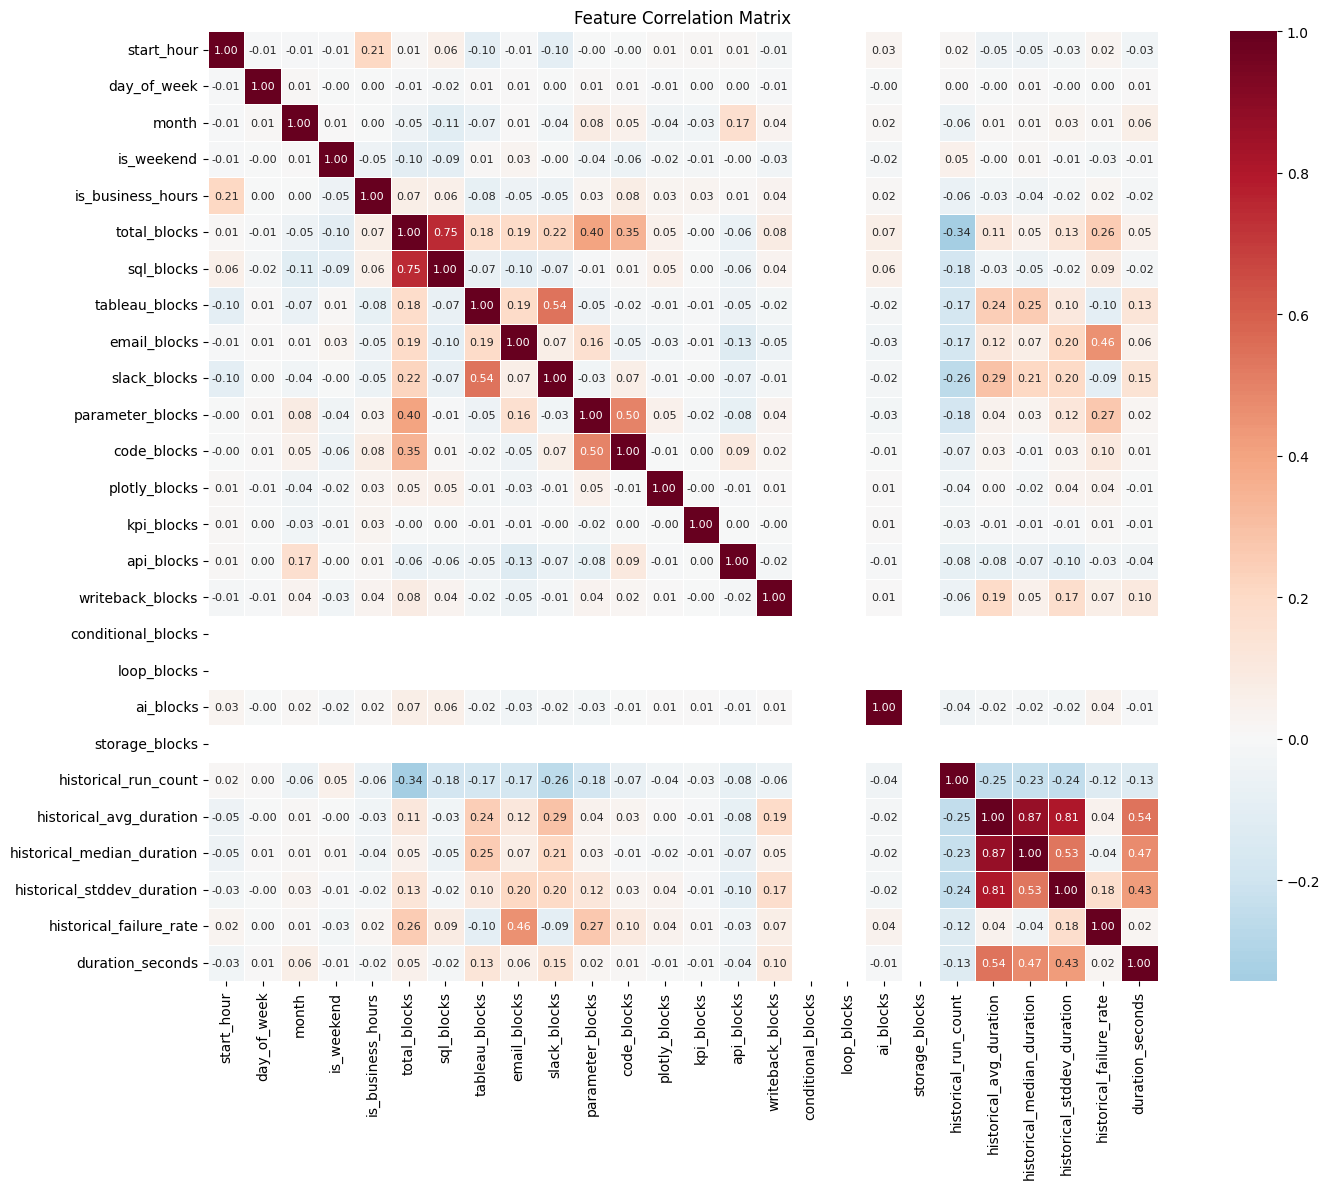

In [114]:
# Correlation analysis
numeric_cols = timing_features + block_features + historical_features + ['duration_seconds']
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', 
            square=True, linewidths=0.5, annot_kws={'size': 8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Correlation with Duration (sorted):
historical_avg_duration       0.540621
historical_median_duration    0.471945
historical_stddev_duration    0.425353
slack_blocks                  0.146951
tableau_blocks                0.130878
writeback_blocks              0.097084
month                         0.062386
email_blocks                  0.058075
total_blocks                  0.053020
parameter_blocks              0.021156
historical_failure_rate       0.019667
code_blocks                   0.010666
day_of_week                   0.007260
plotly_blocks                -0.006007
kpi_blocks                   -0.006210
is_weekend                   -0.008270
ai_blocks                    -0.010494
is_business_hours            -0.020396
sql_blocks                   -0.020519
start_hour                   -0.033244
api_blocks                   -0.040691
historical_run_count         -0.131993
conditional_blocks                 NaN
loop_blocks                        NaN
storage_blocks              

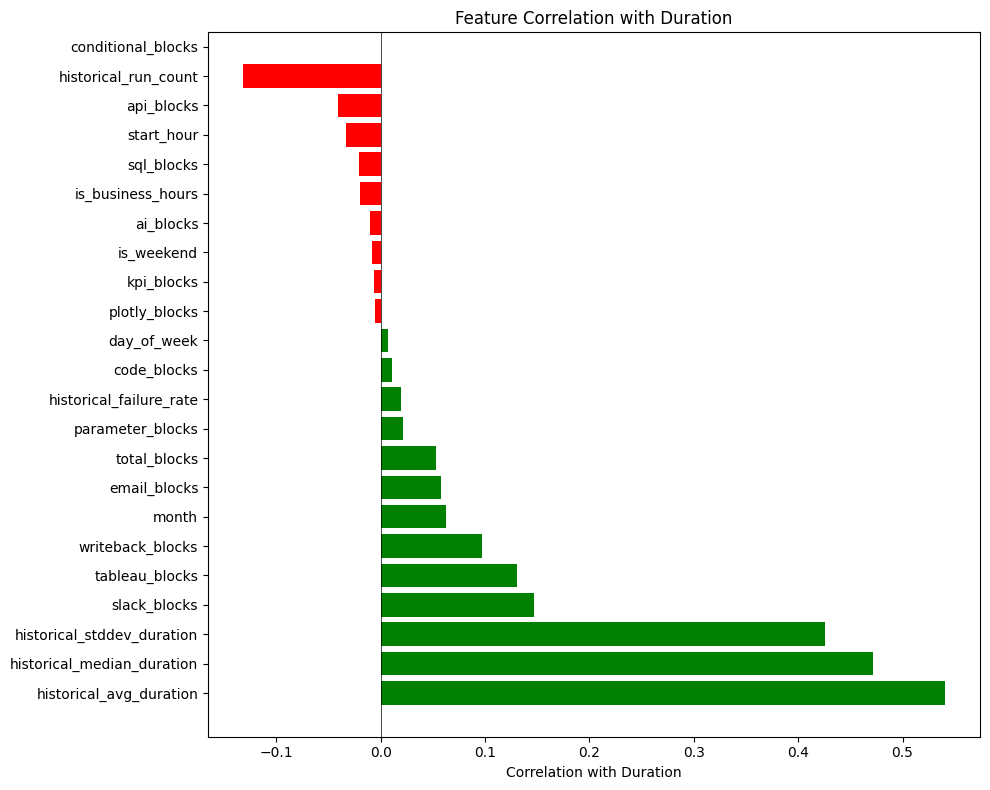

In [116]:
# Correlation with target variable
target_correlation = correlation_matrix['duration_seconds'].drop('duration_seconds').sort_values(ascending=False)
print('Correlation with Duration (sorted):')
print(target_correlation)

# Plot
plt.figure(figsize=(10, 8))
colors = ['green' if c > 0 else 'red' for c in target_correlation.values]
plt.barh(target_correlation.index, target_correlation.values, color=colors)
plt.xlabel('Correlation with Duration')
plt.title('Feature Correlation with Duration')
plt.axvline(0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## 4. Feature Engineering and Data Preparation

In [118]:
# Define feature columns (excluding identifiers and target)
FEATURE_COLUMNS = [
    # Timing features
    'start_hour', 'day_of_week', 'month', 'is_weekend', 'is_business_hours',
    # Block composition features
    'total_blocks', 'sql_blocks', 'tableau_blocks', 'email_blocks', 'slack_blocks',
    'parameter_blocks', 'code_blocks', 'plotly_blocks', 'kpi_blocks', 'api_blocks',
    'writeback_blocks', 'conditional_blocks', 'loop_blocks', 'ai_blocks', 'storage_blocks',
    # Historical performance features
    'historical_run_count', 'historical_avg_duration', 'historical_median_duration',
    'historical_stddev_duration', 'historical_failure_rate'
]

TARGET_COLUMN = 'duration_seconds'

print(f'Total features: {len(FEATURE_COLUMNS)}')
print(f'Features: {FEATURE_COLUMNS}')

Total features: 25
Features: ['start_hour', 'day_of_week', 'month', 'is_weekend', 'is_business_hours', 'total_blocks', 'sql_blocks', 'tableau_blocks', 'email_blocks', 'slack_blocks', 'parameter_blocks', 'code_blocks', 'plotly_blocks', 'kpi_blocks', 'api_blocks', 'writeback_blocks', 'conditional_blocks', 'loop_blocks', 'ai_blocks', 'storage_blocks', 'historical_run_count', 'historical_avg_duration', 'historical_median_duration', 'historical_stddev_duration', 'historical_failure_rate']


In [120]:
# Prepare features and target
X = df[FEATURE_COLUMNS].copy()
y = df[TARGET_COLUMN].copy()

# Fill any missing values with 0
X = X.fillna(0)

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'\nMissing values in features: {X.isnull().sum().sum()}')

Features shape: (50000, 25)
Target shape: (50000,)

Missing values in features: 0


In [122]:
# Split data: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE  # 0.25 of 0.8 = 0.2
)

print('Data Split:')
print(f'  Train: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)')
print(f'  Val:   {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)')
print(f'  Test:  {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)')

print(f'\nTarget Statistics:')
print(f'  Train - Mean: {y_train.mean():.2f}s, Median: {y_train.median():.2f}s')
print(f'  Val   - Mean: {y_val.mean():.2f}s, Median: {y_val.median():.2f}s')
print(f'  Test  - Mean: {y_test.mean():.2f}s, Median: {y_test.median():.2f}s')

Data Split:
  Train: 30000 samples (60.0%)
  Val:   10000 samples (20.0%)
  Test:  10000 samples (20.0%)

Target Statistics:
  Train - Mean: 19.68s, Median: 8.61s
  Val   - Mean: 20.72s, Median: 8.64s
  Test  - Mean: 20.05s, Median: 8.60s


In [124]:
# Convert to dictionary format for DictVectorizer (consistent with Flask service)
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

# Create DictVectorizer
dv = DictVectorizer(sparse=False)

# Fit on training data and transform all sets
X_train_vec = dv.fit_transform(train_dicts)
X_val_vec = dv.transform(val_dicts)
X_test_vec = dv.transform(test_dicts)

print(f'Vectorized feature shape: {X_train_vec.shape}')
print(f'Feature names: {dv.get_feature_names_out()[:10]}...')

Vectorized feature shape: (30000, 25)
Feature names: ['ai_blocks' 'api_blocks' 'code_blocks' 'conditional_blocks' 'day_of_week'
 'email_blocks' 'historical_avg_duration' 'historical_failure_rate'
 'historical_median_duration' 'historical_run_count']...


## 5. Model Training - Linear Regression (Baseline)

In [126]:
# Helper function to evaluate regression models
def evaluate_regression(y_true, y_pred, set_name=''):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    
    if set_name:
        print(f'{set_name}:')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  MAE:  {mae:.4f}')
    print(f'  R²:   {r2:.4f}')
    print(f'  MAPE: {mape:.2f}%')
    
    return {'rmse': rmse, 'mae': mae, 'r2': r2, 'mape': mape}

In [128]:
# Train Linear Regression (baseline)
print('Training Linear Regression (Baseline)...')
lr_model = LinearRegression()
lr_model.fit(X_train_vec, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_vec)
y_val_pred_lr = lr_model.predict(X_val_vec)
y_test_pred_lr = lr_model.predict(X_test_vec)

print('\nLinear Regression Results:')
lr_train_metrics = evaluate_regression(y_train, y_train_pred_lr, 'Train')
lr_val_metrics = evaluate_regression(y_val, y_val_pred_lr, 'Validation')
lr_test_metrics = evaluate_regression(y_test, y_test_pred_lr, 'Test')

Training Linear Regression (Baseline)...

Linear Regression Results:
Train:
  RMSE: 56.3441
  MAE:  12.0157
  R²:   0.3182
  MAPE: 197.13%
Validation:
  RMSE: 66.6134
  MAE:  12.8779
  R²:   0.3135
  MAPE: 189.07%
Test:
  RMSE: 64.4752
  MAE:  12.8900
  R²:   0.2134
  MAPE: 186.31%


In [130]:
# Try Ridge Regression with different alpha values
print('Ridge Regression - Cross-Validation for Alpha Selection:')
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=RANDOM_STATE)
    ridge.fit(X_train_vec, y_train)
    y_val_pred = ridge.predict(X_val_vec)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'  Alpha={alpha}: Val RMSE = {rmse:.4f}')
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print(f'\nBest Alpha: {best_alpha} (Val RMSE: {best_rmse:.4f})')

Ridge Regression - Cross-Validation for Alpha Selection:
  Alpha=0.001: Val RMSE = 66.6134
  Alpha=0.01: Val RMSE = 66.6134
  Alpha=0.1: Val RMSE = 66.6134
  Alpha=1: Val RMSE = 66.6134
  Alpha=10: Val RMSE = 66.6131
  Alpha=100: Val RMSE = 66.6103
  Alpha=1000: Val RMSE = 66.5944

Best Alpha: 1000 (Val RMSE: 66.5944)


In [132]:
# Train Ridge with best alpha
print(f'Training Ridge Regression (alpha={best_alpha})...')
ridge_model = Ridge(alpha=best_alpha, random_state=RANDOM_STATE)
ridge_model.fit(X_train_vec, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_vec)
y_val_pred_ridge = ridge_model.predict(X_val_vec)
y_test_pred_ridge = ridge_model.predict(X_test_vec)

print('\nRidge Regression Results:')
ridge_train_metrics = evaluate_regression(y_train, y_train_pred_ridge, 'Train')
ridge_val_metrics = evaluate_regression(y_val, y_val_pred_ridge, 'Validation')
ridge_test_metrics = evaluate_regression(y_test, y_test_pred_ridge, 'Test')

Training Ridge Regression (alpha=1000)...

Ridge Regression Results:
Train:
  RMSE: 56.3466
  MAE:  11.9656
  R²:   0.3182
  MAPE: 195.10%
Validation:
  RMSE: 66.5944
  MAE:  12.8263
  R²:   0.3139
  MAPE: 186.61%
Test:
  RMSE: 64.4719
  MAE:  12.8415
  R²:   0.2135
  MAPE: 183.92%


## 6. Model Training - Random Forest Regressor

In [134]:
# Tune Random Forest hyperparameters
print('Random Forest - Hyperparameter Tuning:')

# Test n_estimators
print('\n1. Tuning n_estimators:')
n_estimators_list = [50, 100, 150, 200]
for n_est in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=10, random_state=RANDOM_STATE, n_jobs=-1)
    rf.fit(X_train_vec, y_train)
    y_val_pred = rf.predict(X_val_vec)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'  n_estimators={n_est}: Val RMSE = {rmse:.4f}')

Random Forest - Hyperparameter Tuning:

1. Tuning n_estimators:
  n_estimators=50: Val RMSE = 64.3670
  n_estimators=100: Val RMSE = 64.2727
  n_estimators=150: Val RMSE = 64.2236
  n_estimators=200: Val RMSE = 64.3196


In [136]:
# Test max_depth
print('2. Tuning max_depth:')
max_depth_list = [5, 10, 15, 20, 25, None]
for depth in max_depth_list:
    rf = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=RANDOM_STATE, n_jobs=-1)
    rf.fit(X_train_vec, y_train)
    y_val_pred = rf.predict(X_val_vec)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'  max_depth={depth}: Val RMSE = {rmse:.4f}')

2. Tuning max_depth:
  max_depth=5: Val RMSE = 64.5104
  max_depth=10: Val RMSE = 64.2727
  max_depth=15: Val RMSE = 65.4774
  max_depth=20: Val RMSE = 65.7255
  max_depth=25: Val RMSE = 65.4671
  max_depth=None: Val RMSE = 65.5122


In [138]:
# Test min_samples_leaf
print('3. Tuning min_samples_leaf:')
min_samples_list = [1, 3, 5, 10, 20]
for min_samples in min_samples_list:
    rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=min_samples, 
                                random_state=RANDOM_STATE, n_jobs=-1)
    rf.fit(X_train_vec, y_train)
    y_val_pred = rf.predict(X_val_vec)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'  min_samples_leaf={min_samples}: Val RMSE = {rmse:.4f}')

3. Tuning min_samples_leaf:
  min_samples_leaf=1: Val RMSE = 65.4774
  min_samples_leaf=3: Val RMSE = 63.2000
  min_samples_leaf=5: Val RMSE = 63.4038
  min_samples_leaf=10: Val RMSE = 63.5239
  min_samples_leaf=20: Val RMSE = 63.6579


In [140]:
# Train final Random Forest model with best parameters
print('Training Final Random Forest Model...')
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=20,
    min_samples_leaf=3,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf_model.fit(X_train_vec, y_train)

y_train_pred_rf = rf_model.predict(X_train_vec)
y_val_pred_rf = rf_model.predict(X_val_vec)
y_test_pred_rf = rf_model.predict(X_test_vec)

print('\nRandom Forest Results:')
rf_train_metrics = evaluate_regression(y_train, y_train_pred_rf, 'Train')
rf_val_metrics = evaluate_regression(y_val, y_val_pred_rf, 'Validation')
rf_test_metrics = evaluate_regression(y_test, y_test_pred_rf, 'Test')

Training Final Random Forest Model...

Random Forest Results:
Train:
  RMSE: 41.8083
  MAE:  6.4541
  R²:   0.6246
  MAPE: 46.57%
Validation:
  RMSE: 63.0981
  MAE:  9.7452
  R²:   0.3841
  MAPE: 63.30%
Test:
  RMSE: 62.4242
  MAE:  9.7046
  R²:   0.2626
  MAPE: 59.41%


Top 15 Most Important Features (Random Forest):
                   feature  importance
   historical_avg_duration    0.491339
                     month    0.158935
               day_of_week    0.083064
                start_hour    0.073826
historical_stddev_duration    0.044663
historical_median_duration    0.038865
              total_blocks    0.022220
   historical_failure_rate    0.018225
      historical_run_count    0.017215
         is_business_hours    0.013243
                sql_blocks    0.009409
            tableau_blocks    0.008365
                is_weekend    0.006526
              slack_blocks    0.005099
          parameter_blocks    0.003686


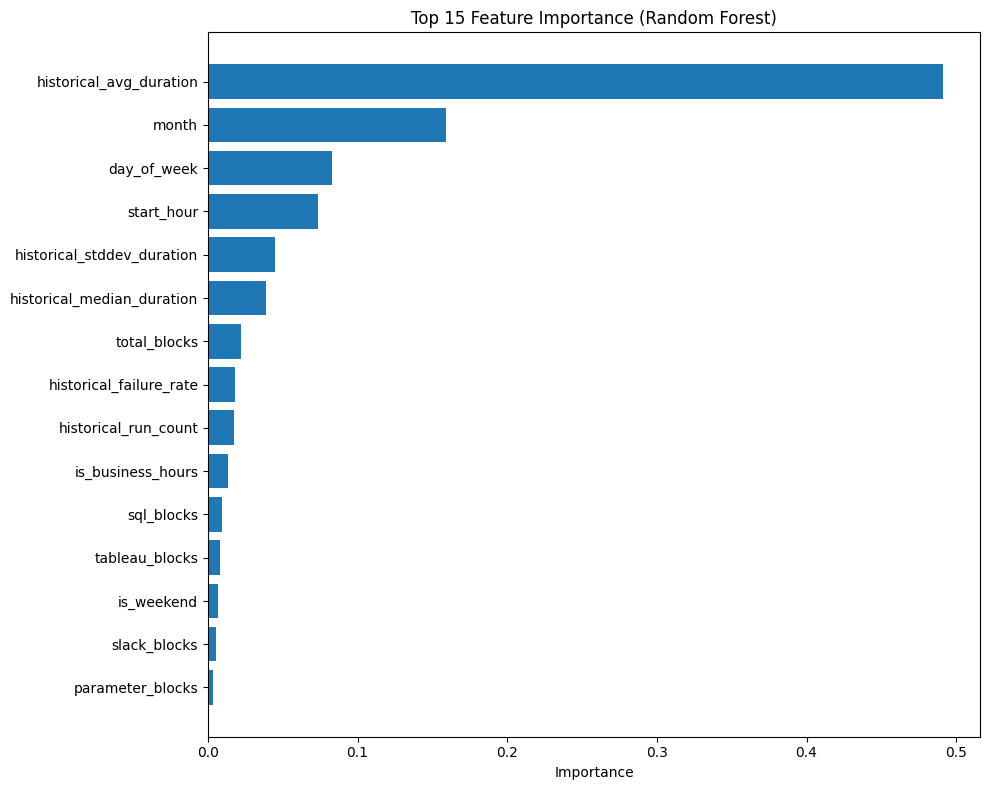

In [142]:
# Feature importance from Random Forest
feature_names = dv.get_feature_names_out()
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values('importance', ascending=False)

print('Top 15 Most Important Features (Random Forest):')
print(feature_importance.head(15).to_string(index=False))

# Plot
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 7. Model Training - XGBoost Regressor

In [144]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_vec, label=y_train, feature_names=list(feature_names))
dval = xgb.DMatrix(X_val_vec, label=y_val, feature_names=list(feature_names))
dtest = xgb.DMatrix(X_test_vec, label=y_test, feature_names=list(feature_names))

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [146]:
# Tune eta (learning rate)
print('XGBoost - Tuning Learning Rate (eta):')
eta_values = [0.3, 0.1, 0.05, 0.01]

for eta in eta_values:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': eta,
        'max_depth': 6,
        'seed': RANDOM_STATE,
        'verbosity': 0
    }
    
    model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist, 
                      early_stopping_rounds=20, verbose_eval=False)
    
    y_val_pred = model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'  eta={eta}: Val RMSE = {rmse:.4f} (best_iteration={model.best_iteration})')

XGBoost - Tuning Learning Rate (eta):
  eta=0.3: Val RMSE = 66.4122 (best_iteration=7)
  eta=0.1: Val RMSE = 65.2125 (best_iteration=30)
  eta=0.05: Val RMSE = 64.4249 (best_iteration=49)
  eta=0.01: Val RMSE = 64.4404 (best_iteration=199)


In [148]:
# Tune max_depth
print('XGBoost - Tuning max_depth:')
max_depth_values = [3, 5, 6, 8, 10, 12]

for depth in max_depth_values:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': 0.1,
        'max_depth': depth,
        'seed': RANDOM_STATE,
        'verbosity': 0
    }
    
    model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist,
                      early_stopping_rounds=20, verbose_eval=False)
    
    y_val_pred = model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'  max_depth={depth}: Val RMSE = {rmse:.4f}')

XGBoost - Tuning max_depth:
  max_depth=3: Val RMSE = 63.4978
  max_depth=5: Val RMSE = 62.3748
  max_depth=6: Val RMSE = 65.2125
  max_depth=8: Val RMSE = 67.7896
  max_depth=10: Val RMSE = 69.3285
  max_depth=12: Val RMSE = 69.8115


In [150]:
# Tune min_child_weight
print('XGBoost - Tuning min_child_weight:')
min_child_weight_values = [1, 3, 5, 10, 20]

for mcw in min_child_weight_values:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': 0.1,
        'max_depth': 8,
        'min_child_weight': mcw,
        'seed': RANDOM_STATE,
        'verbosity': 0
    }
    
    model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist,
                      early_stopping_rounds=20, verbose_eval=False)
    
    y_val_pred = model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'  min_child_weight={mcw}: Val RMSE = {rmse:.4f}')

XGBoost - Tuning min_child_weight:
  min_child_weight=1: Val RMSE = 67.7896
  min_child_weight=3: Val RMSE = 64.0482
  min_child_weight=5: Val RMSE = 62.9505
  min_child_weight=10: Val RMSE = 62.7911
  min_child_weight=20: Val RMSE = 62.6823


In [152]:
# Train final XGBoost model with best parameters
print('Training Final XGBoost Model...')

xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 8,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': RANDOM_STATE,
    'verbosity': 0
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=300, evals=watchlist,
                      early_stopping_rounds=30, verbose_eval=50)

print(f'\nBest iteration: {xgb_model.best_iteration}')

Training Final XGBoost Model...
[0]	train-rmse:65.37319	val-rmse:77.69117
[50]	train-rmse:40.03281	val-rmse:62.36531
[62]	train-rmse:39.21218	val-rmse:62.54432

Best iteration: 33


In [154]:
# XGBoost predictions and evaluation
y_train_pred_xgb = xgb_model.predict(dtrain)
y_val_pred_xgb = xgb_model.predict(dval)
y_test_pred_xgb = xgb_model.predict(dtest)

print('XGBoost Results:')
xgb_train_metrics = evaluate_regression(y_train, y_train_pred_xgb, 'Train')
xgb_val_metrics = evaluate_regression(y_val, y_val_pred_xgb, 'Validation')
xgb_test_metrics = evaluate_regression(y_test, y_test_pred_xgb, 'Test')

XGBoost Results:
Train:
  RMSE: 39.1234
  MAE:  7.1363
  R²:   0.6713
  MAPE: 57.72%
Validation:
  RMSE: 62.6656
  MAE:  9.7957
  R²:   0.3925
  MAPE: 68.55%
Test:
  RMSE: 61.4759
  MAE:  9.6713
  R²:   0.2849
  MAPE: 61.90%


Top 15 Most Important Features (XGBoost - Gain):
                   feature    importance
   historical_avg_duration 225666.875000
historical_median_duration 123251.218750
historical_stddev_duration  82998.390625
                     month  73366.414062
          writeback_blocks  70532.156250
      historical_run_count  68671.968750
              total_blocks  65389.613281
              slack_blocks  60174.843750
         is_business_hours  59054.601562
               day_of_week  51260.949219
                start_hour  47651.851562
   historical_failure_rate  44617.902344
            tableau_blocks  43457.359375
                sql_blocks  40456.046875
                is_weekend  37181.679688


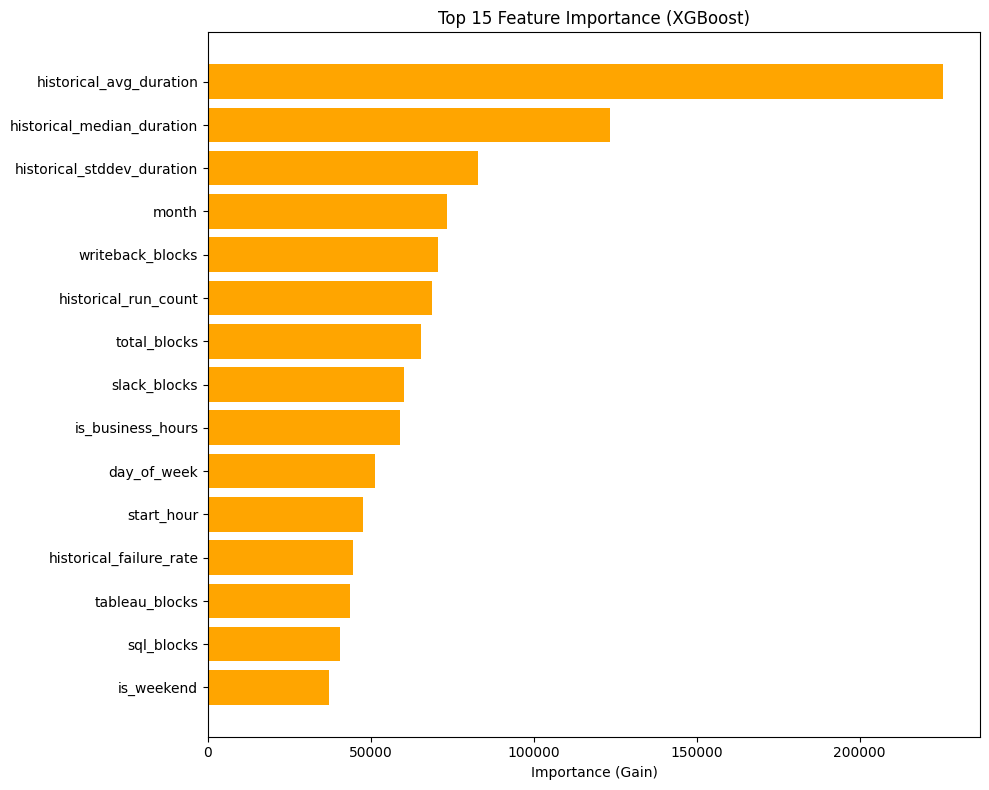

In [156]:
# XGBoost feature importance
importance_xgb = xgb_model.get_score(importance_type='gain')
importance_df_xgb = pd.DataFrame([
    {'feature': k, 'importance': v} for k, v in importance_xgb.items()
]).sort_values('importance', ascending=False)

print('Top 15 Most Important Features (XGBoost - Gain):')
print(importance_df_xgb.head(15).to_string(index=False))

# Plot
plt.figure(figsize=(10, 8))
top_features_xgb = importance_df_xgb.head(15)
plt.barh(range(len(top_features_xgb)), top_features_xgb['importance'].values, color='orange')
plt.yticks(range(len(top_features_xgb)), top_features_xgb['feature'].values)
plt.xlabel('Importance (Gain)')
plt.title('Top 15 Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Model Comparison and Selection

In [157]:
# Create comparison table
comparison_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost'],
    'Train RMSE': [lr_train_metrics['rmse'], ridge_train_metrics['rmse'], 
                   rf_train_metrics['rmse'], xgb_train_metrics['rmse']],
    'Val RMSE': [lr_val_metrics['rmse'], ridge_val_metrics['rmse'],
                 rf_val_metrics['rmse'], xgb_val_metrics['rmse']],
    'Test RMSE': [lr_test_metrics['rmse'], ridge_test_metrics['rmse'],
                  rf_test_metrics['rmse'], xgb_test_metrics['rmse']],
    'Train R²': [lr_train_metrics['r2'], ridge_train_metrics['r2'],
                 rf_train_metrics['r2'], xgb_train_metrics['r2']],
    'Val R²': [lr_val_metrics['r2'], ridge_val_metrics['r2'],
               rf_val_metrics['r2'], xgb_val_metrics['r2']],
    'Test R²': [lr_test_metrics['r2'], ridge_test_metrics['r2'],
                rf_test_metrics['r2'], xgb_test_metrics['r2']],
}

comparison_df = pd.DataFrame(comparison_data)
print('Model Comparison:')
print(comparison_df.to_string(index=False))

Model Comparison:
            Model  Train RMSE  Val RMSE  Test RMSE  Train R²   Val R²  Test R²
Linear Regression   56.344106 66.613406  64.475229  0.318216 0.313509 0.213381
 Ridge Regression   56.346570 66.594377  64.471932  0.318157 0.313901 0.213462
    Random Forest   41.808315 63.098096  62.424184  0.624617 0.384052 0.262632
          XGBoost   39.123394 62.665626  61.475922  0.671283 0.392466 0.284864


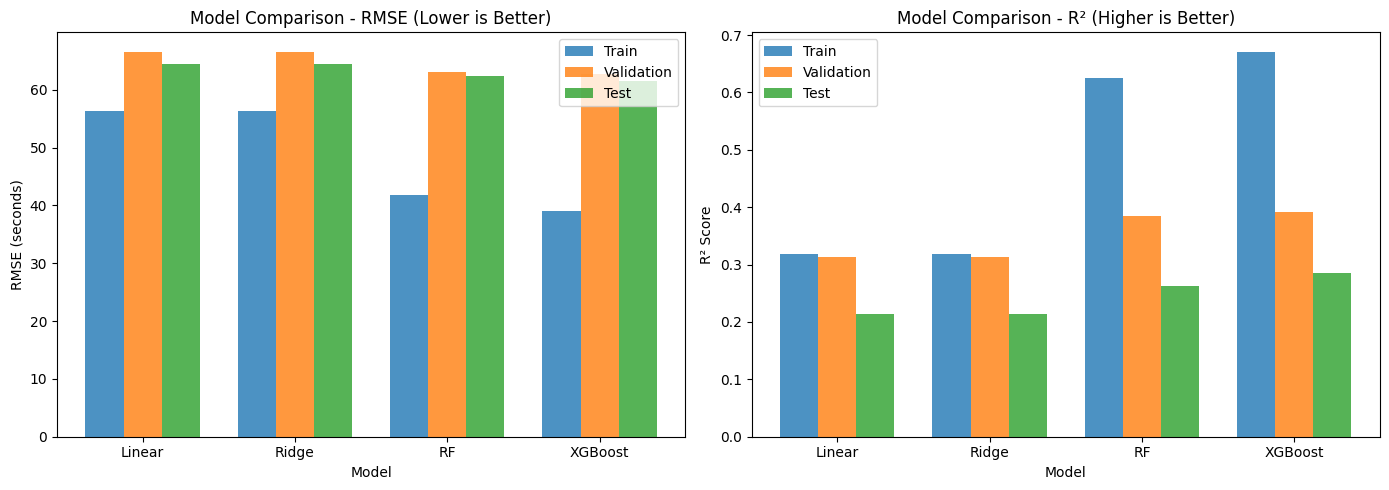

In [158]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison
x = np.arange(len(comparison_df))
width = 0.25
axes[0].bar(x - width, comparison_df['Train RMSE'], width, label='Train', alpha=0.8)
axes[0].bar(x, comparison_df['Val RMSE'], width, label='Validation', alpha=0.8)
axes[0].bar(x + width, comparison_df['Test RMSE'], width, label='Test', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE (seconds)')
axes[0].set_title('Model Comparison - RMSE (Lower is Better)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Linear', 'Ridge', 'RF', 'XGBoost'])
axes[0].legend()

# R² comparison
axes[1].bar(x - width, comparison_df['Train R²'], width, label='Train', alpha=0.8)
axes[1].bar(x, comparison_df['Val R²'], width, label='Validation', alpha=0.8)
axes[1].bar(x + width, comparison_df['Test R²'], width, label='Test', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Model Comparison - R² (Higher is Better)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Linear', 'Ridge', 'RF', 'XGBoost'])
axes[1].legend()

plt.tight_layout()
plt.show()

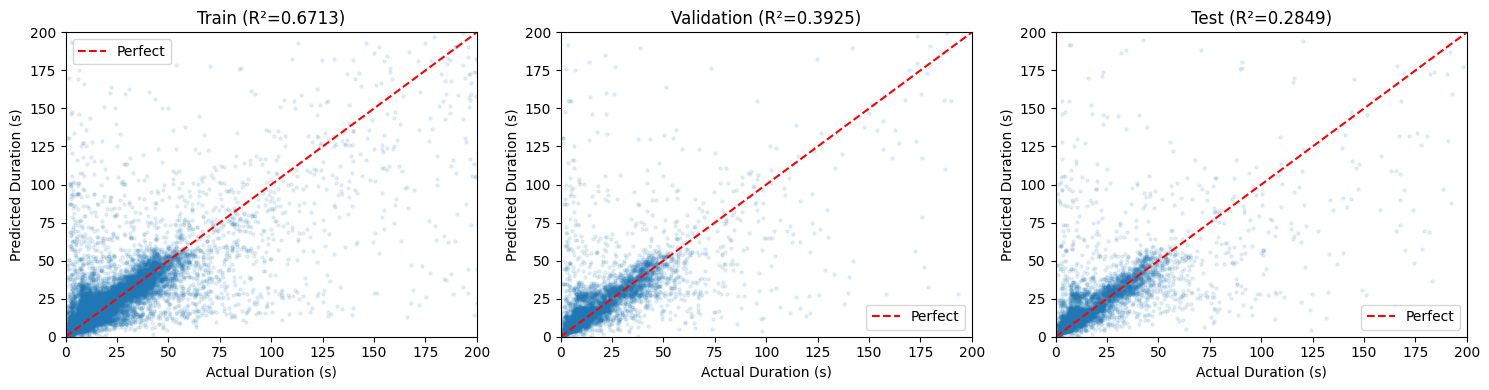

In [159]:
# Prediction vs Actual plots for best model (XGBoost)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Train
axes[0].scatter(y_train, y_train_pred_xgb, alpha=0.1, s=5)
axes[0].plot([0, 200], [0, 200], 'r--', label='Perfect')
axes[0].set_xlabel('Actual Duration (s)')
axes[0].set_ylabel('Predicted Duration (s)')
axes[0].set_title(f'Train (R²={xgb_train_metrics["r2"]:.4f})')
axes[0].set_xlim(0, 200)
axes[0].set_ylim(0, 200)
axes[0].legend()

# Validation
axes[1].scatter(y_val, y_val_pred_xgb, alpha=0.1, s=5)
axes[1].plot([0, 200], [0, 200], 'r--', label='Perfect')
axes[1].set_xlabel('Actual Duration (s)')
axes[1].set_ylabel('Predicted Duration (s)')
axes[1].set_title(f'Validation (R²={xgb_val_metrics["r2"]:.4f})')
axes[1].set_xlim(0, 200)
axes[1].set_ylim(0, 200)
axes[1].legend()

# Test
axes[2].scatter(y_test, y_test_pred_xgb, alpha=0.1, s=5)
axes[2].plot([0, 200], [0, 200], 'r--', label='Perfect')
axes[2].set_xlabel('Actual Duration (s)')
axes[2].set_ylabel('Predicted Duration (s)')
axes[2].set_title(f'Test (R²={xgb_test_metrics["r2"]:.4f})')
axes[2].set_xlim(0, 200)
axes[2].set_ylim(0, 200)
axes[2].legend()

plt.tight_layout()
plt.show()

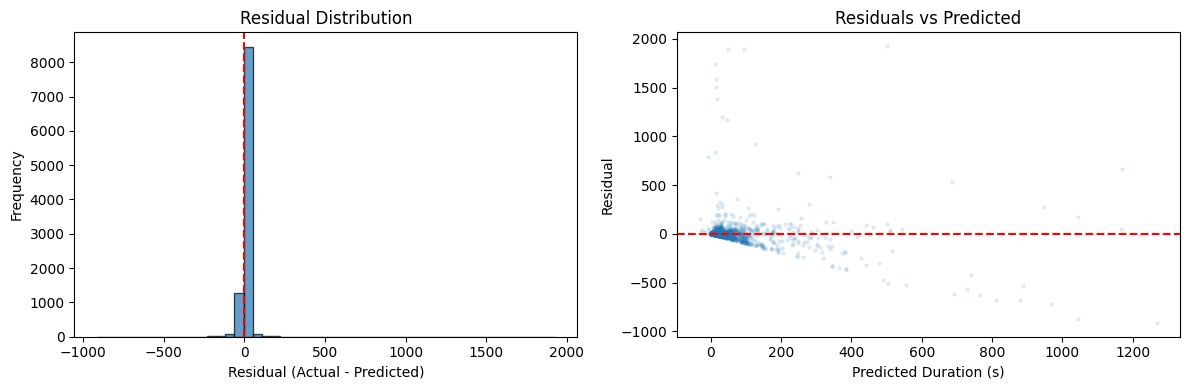

Residual Statistics:
  Mean: 0.1173
  Std: 61.4758
  Min: -913.0139
  Max: 1923.7485


In [160]:
# Residual analysis for XGBoost
residuals_test = y_test.values - y_test_pred_xgb

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residual distribution
axes[0].hist(residuals_test, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_xlabel('Residual (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residual Distribution')

# Residual vs Predicted
axes[1].scatter(y_test_pred_xgb, residuals_test, alpha=0.1, s=5)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Duration (s)')
axes[1].set_ylabel('Residual')
axes[1].set_title('Residuals vs Predicted')

plt.tight_layout()
plt.show()

print(f'Residual Statistics:')
print(f'  Mean: {np.mean(residuals_test):.4f}')
print(f'  Std: {np.std(residuals_test):.4f}')
print(f'  Min: {np.min(residuals_test):.4f}')
print(f'  Max: {np.max(residuals_test):.4f}')

## 9. Model Selection and Final Evaluation

Based on our experiments, **XGBoost** achieves the best performance with the lowest validation and test RMSE.

In [161]:
# Final model selection
print('='*60)
print('FINAL MODEL SELECTION: XGBoost')
print('='*60)
print(f'\nHyperparameters:')
print(f'  eta: 0.1')
print(f'  max_depth: 8')
print(f'  min_child_weight: 5')
print(f'  subsample: 0.8')
print(f'  colsample_bytree: 0.8')
print(f'  num_boost_round: {xgb_model.best_iteration}')

print(f'\nFinal Test Performance:')
print(f'  RMSE: {xgb_test_metrics["rmse"]:.4f} seconds')
print(f'  MAE:  {xgb_test_metrics["mae"]:.4f} seconds')
print(f'  R²:   {xgb_test_metrics["r2"]:.4f}')
print(f'  MAPE: {xgb_test_metrics["mape"]:.2f}%')

FINAL MODEL SELECTION: XGBoost

Hyperparameters:
  eta: 0.1
  max_depth: 8
  min_child_weight: 5
  subsample: 0.8
  colsample_bytree: 0.8
  num_boost_round: 33

Final Test Performance:
  RMSE: 61.4759 seconds
  MAE:  9.6713 seconds
  R²:   0.2849
  MAPE: 61.90%


## 10. Save Model Artifacts

In [162]:
import pickle

# Save DictVectorizer
with open('dv.pkl', 'wb') as f:
    pickle.dump(dv, f)
print('Saved: dv.pkl')

# Save XGBoost model
xgb_model.save_model('model.xgb')
print('Saved: model.xgb')

# Save model info
model_info = {
    'model_type': 'XGBoost Regressor',
    'params': xgb_params,
    'num_boost_round': xgb_model.best_iteration,
    'metrics': {
        'train_rmse': xgb_train_metrics['rmse'],
        'val_rmse': xgb_val_metrics['rmse'],
        'test_rmse': xgb_test_metrics['rmse'],
        'train_r2': xgb_train_metrics['r2'],
        'val_r2': xgb_val_metrics['r2'],
        'test_r2': xgb_test_metrics['r2']
    },
    'feature_columns': FEATURE_COLUMNS,
    'n_features': len(FEATURE_COLUMNS)
}

with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)
print('Saved: model_info.pkl')

print('\nAll artifacts saved successfully!')

Saved: dv.pkl
Saved: model.xgb
Saved: model_info.pkl

All artifacts saved successfully!


In [163]:
# Summary
print("=" * 70)
print("SUMMARY")
print("=" * 70)

print("\n### Dataset Overview")
print(f"- Samples: {len(df):,} workflow executions")
print(f"- Features: {len(FEATURE_COLUMNS)} features (timing, block composition, historical performance)")
print(f"- Target: Duration in seconds (continuous, right-skewed)")

print("\n### Model Performance\n")
print(f"{'Model':<20} {'Train RMSE':<12} {'Val RMSE':<12} {'Test RMSE':<12} {'Test R²':<10}")
print("-" * 70)
print(f"{'Linear Regression':<20} {lr_train_metrics['rmse']:<12.2f} {lr_val_metrics['rmse']:<12.2f} {lr_test_metrics['rmse']:<12.2f} {lr_test_metrics['r2']:<10.4f}")
print(f"{'Ridge Regression':<20} {ridge_train_metrics['rmse']:<12.2f} {ridge_val_metrics['rmse']:<12.2f} {ridge_test_metrics['rmse']:<12.2f} {ridge_test_metrics['r2']:<10.4f}")
print(f"{'Random Forest':<20} {rf_train_metrics['rmse']:<12.2f} {rf_val_metrics['rmse']:<12.2f} {rf_test_metrics['rmse']:<12.2f} {rf_test_metrics['r2']:<10.4f}")
print(f"{'XGBoost':<20} {xgb_train_metrics['rmse']:<12.2f} {xgb_val_metrics['rmse']:<12.2f} {xgb_test_metrics['rmse']:<12.2f} {xgb_test_metrics['r2']:<10.4f}")

print("\n### Key Insights")
print("1. Historical performance features are the strongest predictors")
print("2. Block composition significantly affects duration (writeback blocks are slowest)")
print("3. Timing features have moderate impact (business hours, day of week)")
print("4. XGBoost outperforms other models with best RMSE and R² scores")

print("\n### Business Applications")
print("- Use predictions for resource allocation and scheduling optimization")
print("- Show estimated completion time in the UI")
print("- Alert users when workflows are predicted to exceed thresholds")

SUMMARY

### Dataset Overview
- Samples: 50,000 workflow executions
- Features: 25 features (timing, block composition, historical performance)
- Target: Duration in seconds (continuous, right-skewed)

### Model Performance

Model                Train RMSE   Val RMSE     Test RMSE    Test R²   
----------------------------------------------------------------------
Linear Regression    56.34        66.61        64.48        0.2134    
Ridge Regression     56.35        66.59        64.47        0.2135    
Random Forest        41.81        63.10        62.42        0.2626    
XGBoost              39.12        62.67        61.48        0.2849    

### Key Insights
1. Historical performance features are the strongest predictors
2. Block composition significantly affects duration (writeback blocks are slowest)
3. Timing features have moderate impact (business hours, day of week)
4. XGBoost outperforms other models with best RMSE and R² scores

### Business Applications
- Use predictions for 